<a href="https://colab.research.google.com/github/kwon0136/MachineLearning/blob/master/190424/Question04Answer04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

C:\Users\Administrator\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


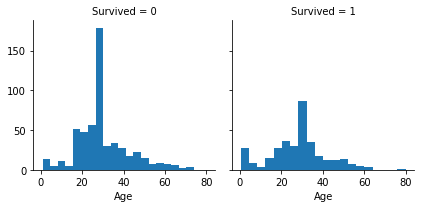

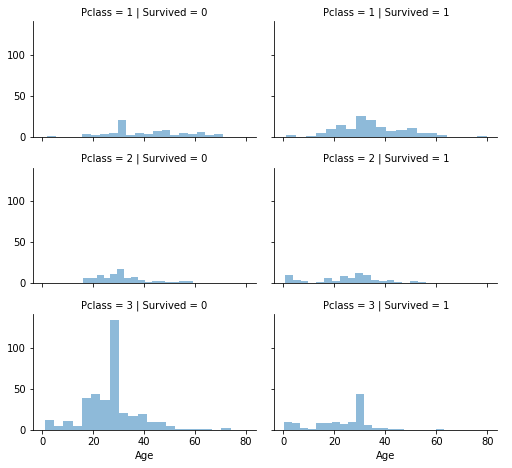

In [0]:
#1
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)
# Pclass, Survived
# groupby
data_temp = \
    train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()
data_temp
# Sex, Survived
data_temp2 = \
    train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()
data_temp2
# sibsp : 함께 탑승한 형제 또는 배우자 수
data_temp2 = \
    train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()
data_temp2
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, \
                    aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()


In [0]:
train = train.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
test = test.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
labelSex = LabelEncoder()
labelSex.fit(train['Sex'])
labelSex.fit(test['Sex'])
train['Sex'] = labelSex.transform(train['Sex'])
test['Sex'] = labelSex.transform(test['Sex'])

In [0]:
x = np.array(train.drop(['Survived'], 1).astype(float))
y = np.array(train['Survived'])

In [0]:
kmeans = KMeans(n_clusters=2, max_iter=900, algorithm="auto")
kmeans.fit(x)
correct = 0
for i in range(len(x)):
    predict_m = np.array(x[i].astype(float))
    predict_m = predict_m.reshape(-1, len(predict_m))
    prediction = kmeans.predict(predict_m)
    if prediction[0] == y[i]:
        correct += 1
        
print(correct/len(x))

0.49158249158249157


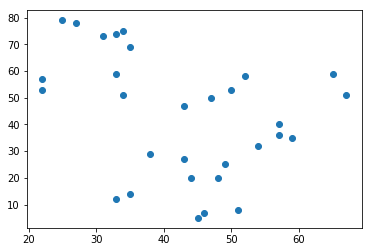

array([[38.75      , 61.625     ],
       [47.07142857, 22.14285714]])

In [0]:
#2
from sklearn import datasets
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("Sample01-k-means.csv")
plt.scatter(data['x'], data['y'])
plt.show()
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(data)
centroids = kmeans.cluster_centers_
centroids

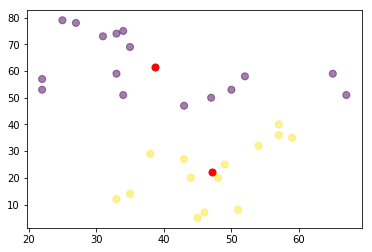

In [0]:
plt.scatter(data['x'], data['y'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)
plt.show()

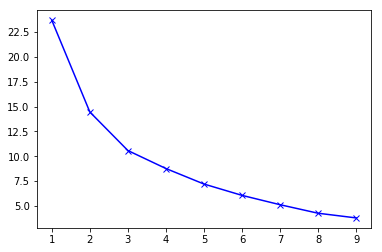

In [0]:
from scipy.spatial.distance import cdist
def testFunc(x, y):
    x1 = x
    y1 = y
    data2 = np.array(list(zip(x1, y1))).reshape(len(x1),2)
    data3 = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(data2)
        kmeanModel.fit(data2)
        d = cdist(data2, kmeanModel.cluster_centers_, 'euclidean') #
        d2 = sum(np.min(d, axis=1)) / data2.shape[0] #
        data3.append(d2)
    
    return data3

test = testFunc(data['x'], data['y'])
plt.plot(range(1,10), test, 'bx-')
plt.show()